<a href="https://colab.research.google.com/github/danielgrgurevic/Desafios_Bootcamp_DL/blob/main/Desaf%C3%ADo_3_Predicci%C3%B3n_de_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DESAFÍO 3 - PREDICCIÓN DE CHURN**

# 1- IMPORTACIÓN Y LIMPIEZA DE DATOS

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Data science/Desafío Latam/5 - Machine Learning /Desafío 3/Telco-Customer-Churn.xlsx')
pd.set_option('display.max_columns', None)  # Muestra todas las columnas

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df = df.dropna()


In [6]:
from sklearn.preprocessing import LabelEncoder

# Seleccionar columnas de tipo object
columnas_object = df.select_dtypes(include=['object']).columns

# Inicializar el codificador
le = LabelEncoder()

# Aplicar LabelEncoder a cada columna de tipo object
for col in columnas_object:
    df[col] = le.fit_transform(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   int64  
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   int64  
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   int64  
 16  PaperlessBilling  7032 non-null   int64  
 17  

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [8]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,3515.500000,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,2030.107879,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1757.750000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,3515.500000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,5273.250000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,7031.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


# 2- ANÁLISIS EXPLORATORIO DE DATOS

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

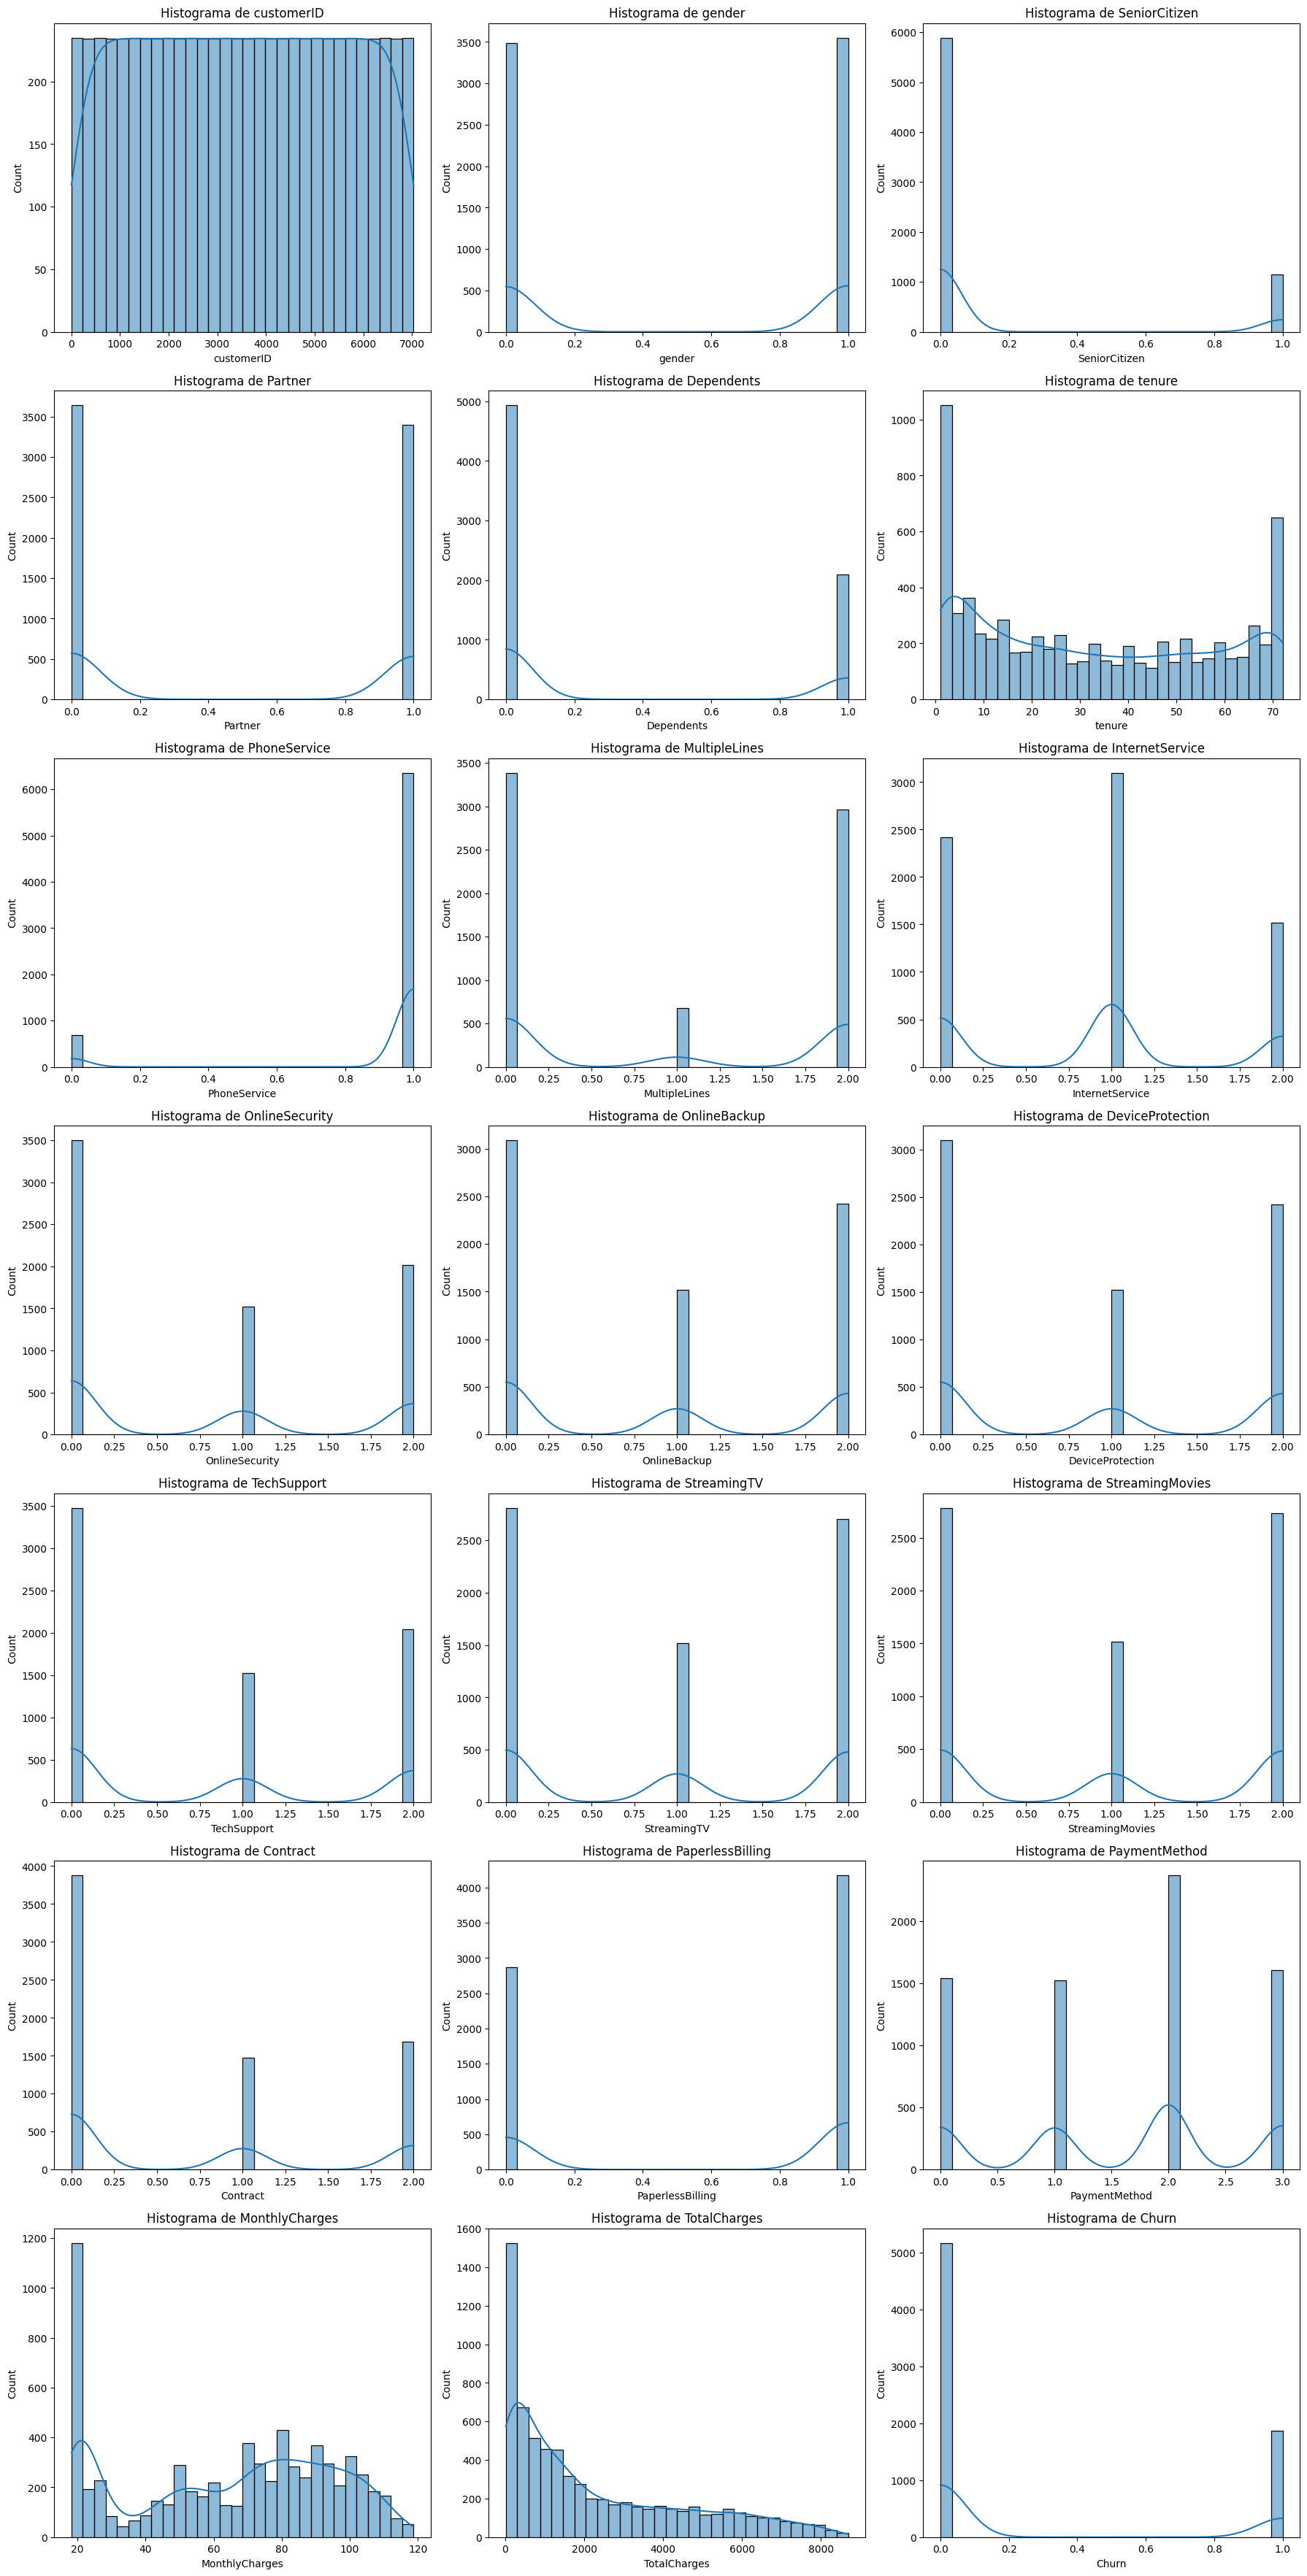

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas del DataFrame
columnas = df.columns.tolist()

# Calcular cuántas filas y columnas necesitamos para mostrar los gráficos
num_columnas = len(columnas)
num_filas = (num_columnas // 3) + 1  # Ajusta según el número de columnas

# Generar histogramas
plt.figure(figsize=(18, num_filas * 5))
for i, columna in enumerate(columnas):
    plt.subplot(num_filas, 3, i+1)
    sns.histplot(df[columna], bins=30, kde=True)
    plt.title(f'Histograma de {columna}')
plt.tight_layout()
plt.show()


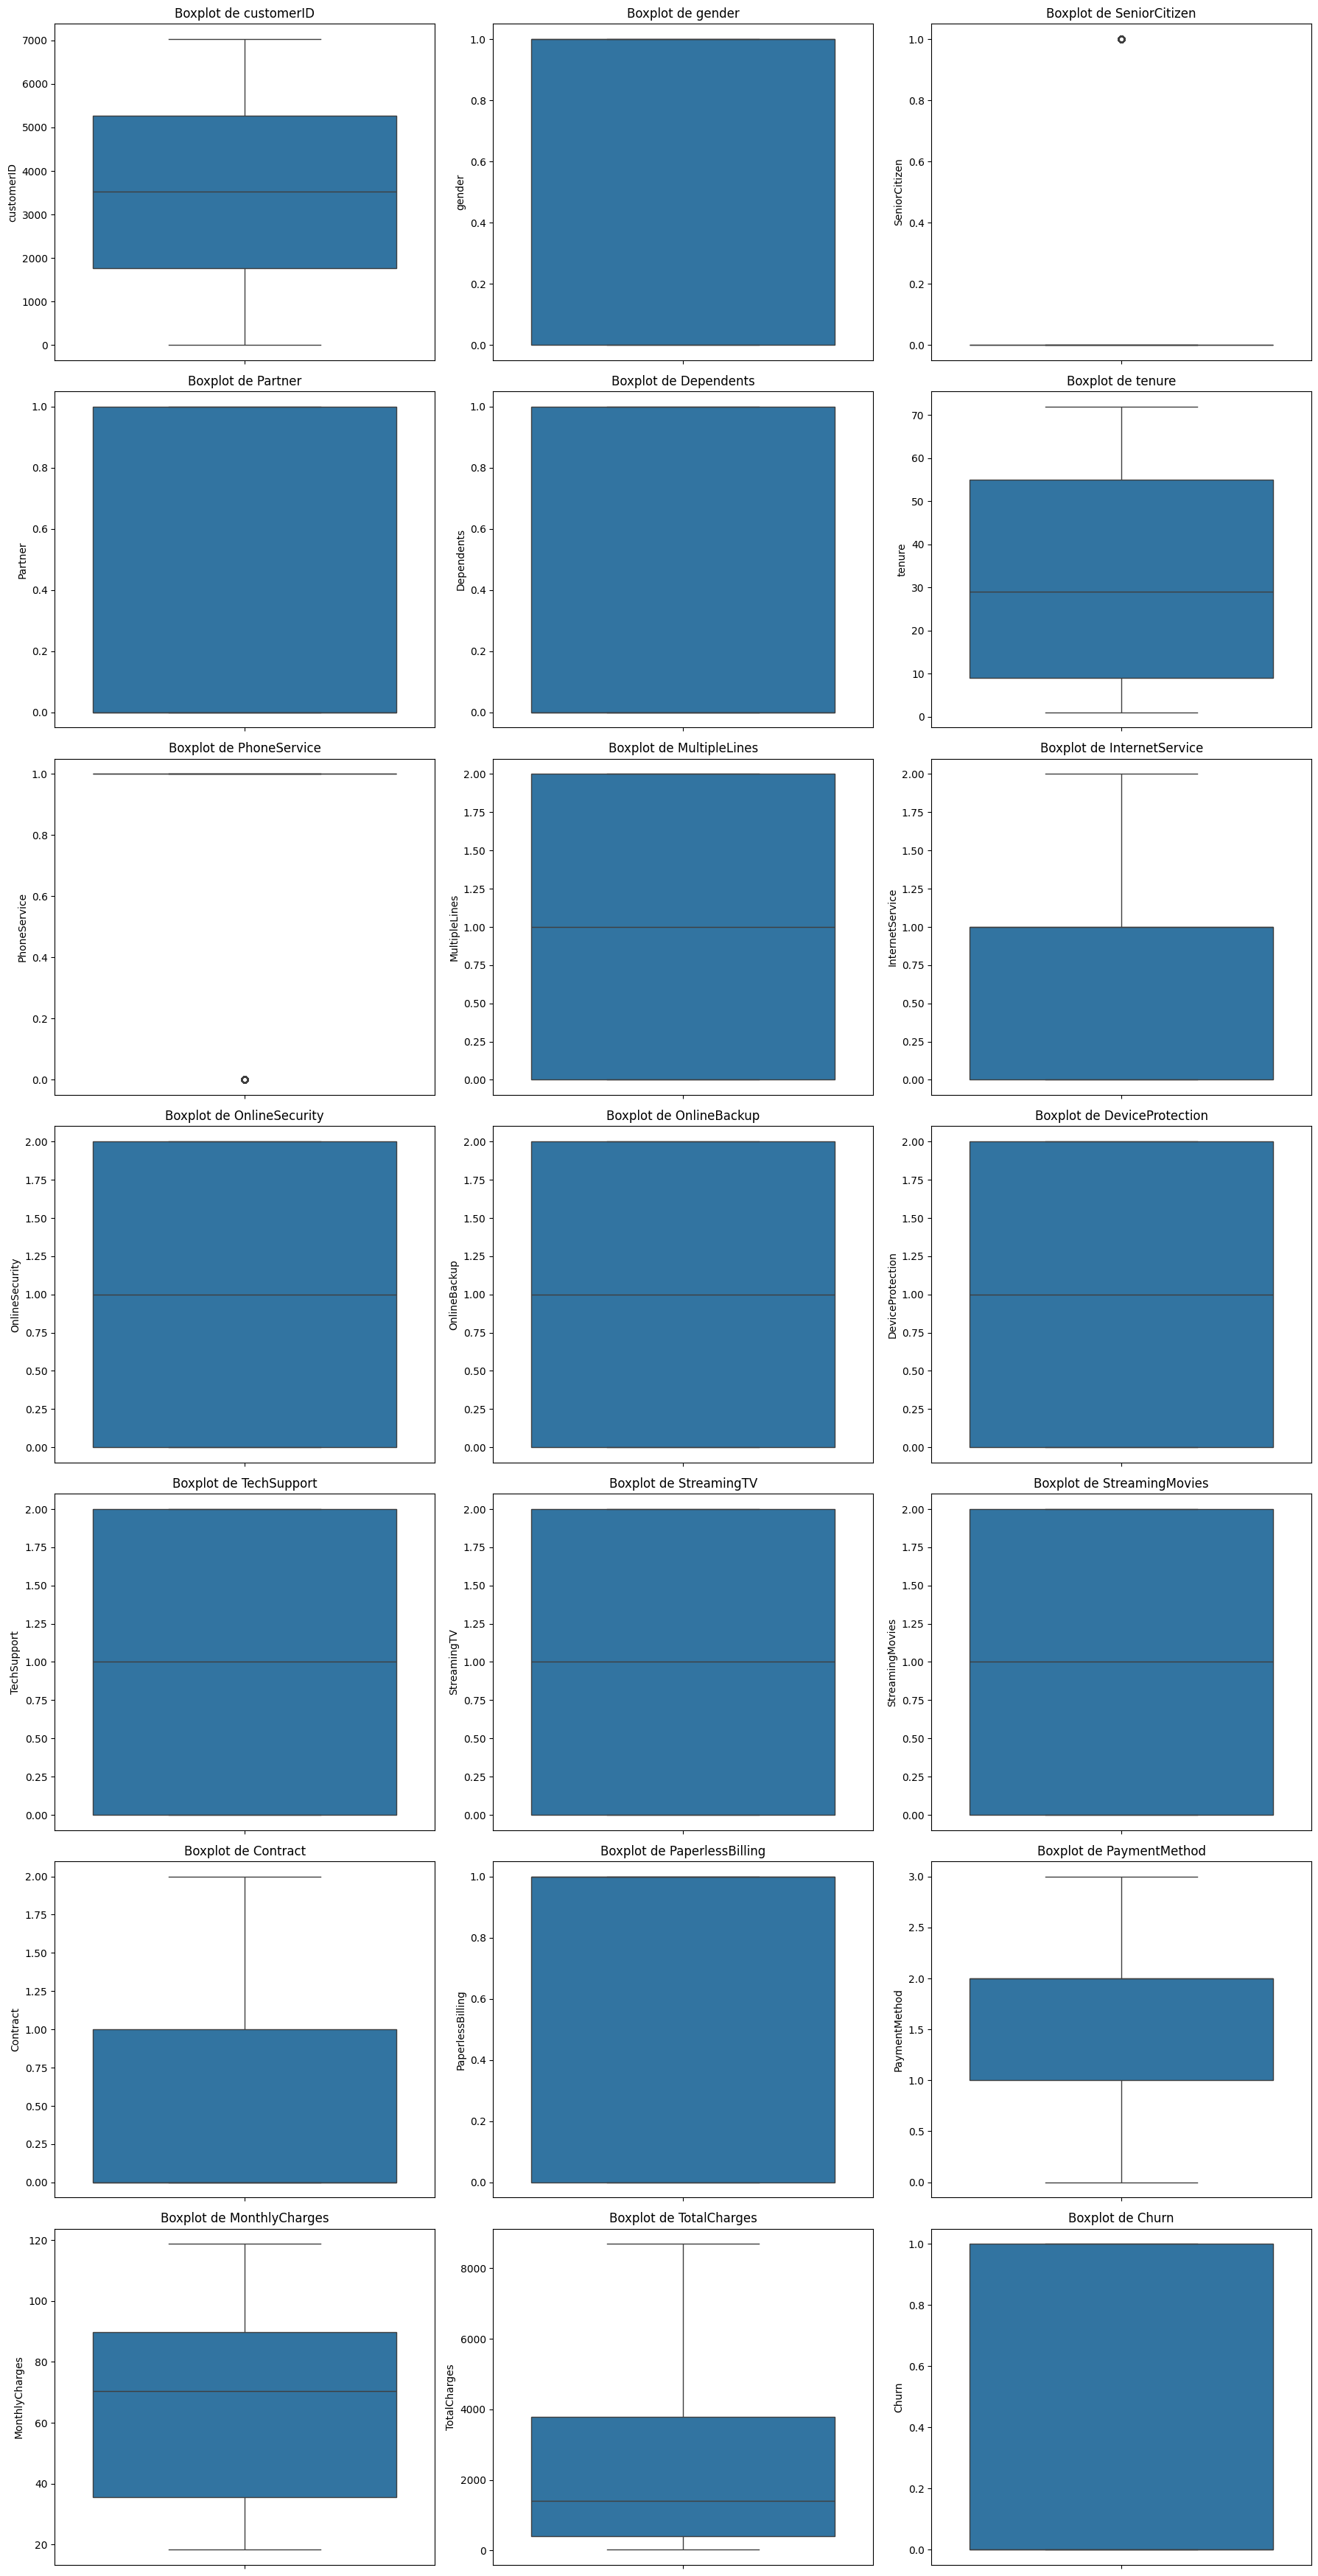

In [11]:
# Calcular cuántas filas y columnas necesitamos para los gráficos
num_filas_boxplot = (num_columnas // 3) + 1

# Generar boxplots
plt.figure(figsize=(18, num_filas_boxplot * 5))
for i, columna in enumerate(columnas):
    plt.subplot(num_filas_boxplot, 3, i+1)  # 3 columnas por fila
    sns.boxplot(y=df[columna])
    plt.title(f'Boxplot de {columna}')
plt.tight_layout()
plt.show()



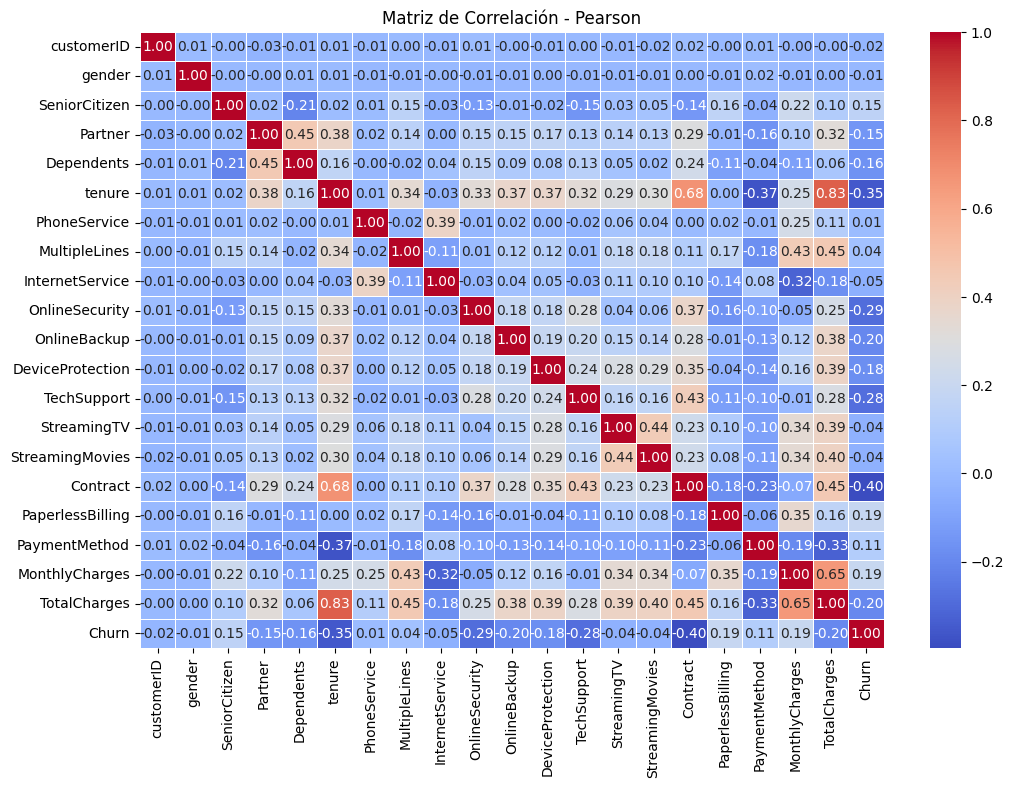

In [12]:
# Calcular la matriz de correlación (Pearson por defecto)
correlation_matrix = df.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación - Pearson')
plt.show()


In [13]:
from scipy.stats import chi2_contingency

# Lista de columnas categóricas
columnas_categoricas = df.columns[df.dtypes == 'int64'].tolist()

# Lista para almacenar los resultados
chi2_results = []

# Realizar el test chi2 entre cada variable categórica y Churn
for columna in columnas_categoricas:
    # Crear la tabla de contingencia
    tabla_contingencia = pd.crosstab(df[columna], df['Churn'])

    # Calcular el test chi2
    chi2, p, dof, ex = chi2_contingency(tabla_contingencia)

    # Almacenar los resultados en la lista
    chi2_results.append({
        'Variable': columna,
        'Chi2': chi2,
        'p-value': p,
        'Degrees of Freedom': dof
    })

# Convertir la lista a un DataFrame
chi2_df = pd.DataFrame(chi2_results)

# Mostrar los resultados
print(chi2_df)

            Variable         Chi2        p-value  Degrees of Freedom
0         customerID  7032.000000   4.943933e-01                7031
1             gender     0.475455   4.904885e-01                   1
2      SeniorCitizen   158.440816   2.479256e-36                   1
3            Partner   157.503151   3.973798e-36                   1
4         Dependents   186.321639   2.019659e-42                   1
5             tenure  1060.292597  3.471813e-176                  71
6       PhoneService     0.873733   3.499240e-01                   1
7      MultipleLines    11.271541   3.567927e-03                   2
8    InternetService   728.695614  5.831199e-159                   2
9     OnlineSecurity   846.677389  1.400687e-184                   2
10      OnlineBackup   599.175185  7.776099e-131                   2
11  DeviceProtection   555.880327  1.959389e-121                   2
12       TechSupport   824.925564  7.407808e-180                   2
13       StreamingTV   372.456502 

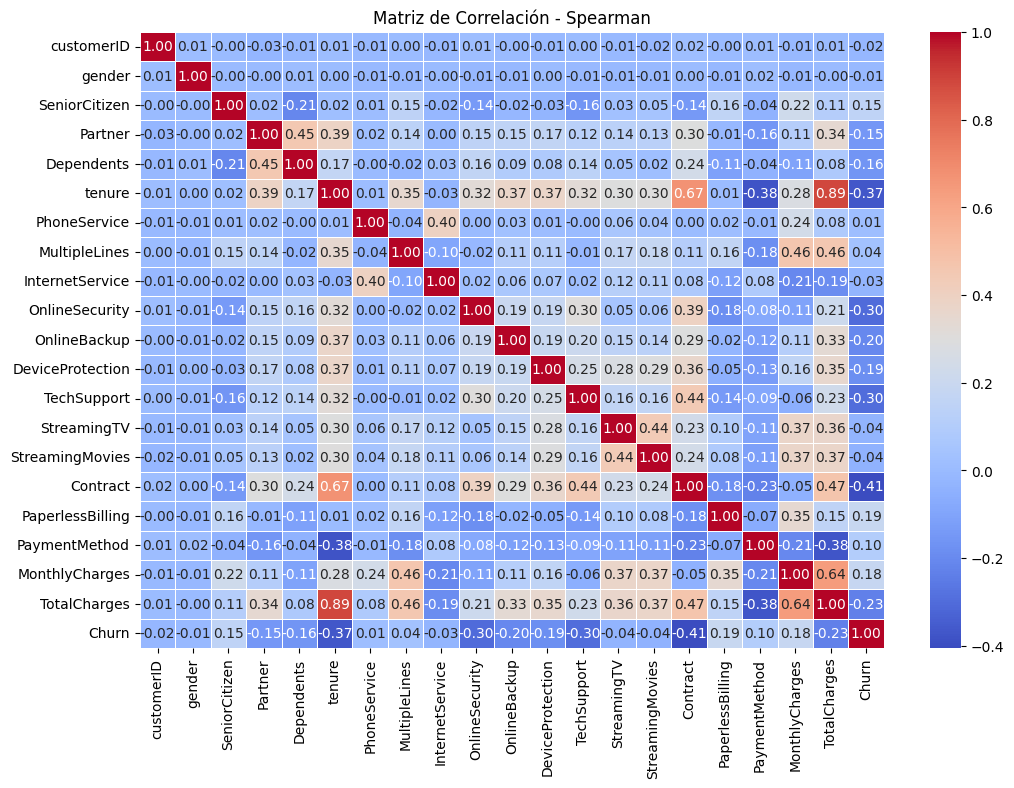

In [14]:
# Calcular la matriz de correlación usando el método de Spearman
spearman_correlation_matrix = df.corr(method='spearman')

# Graficar la matriz de correlación de Spearman
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación - Spearman')
plt.show()


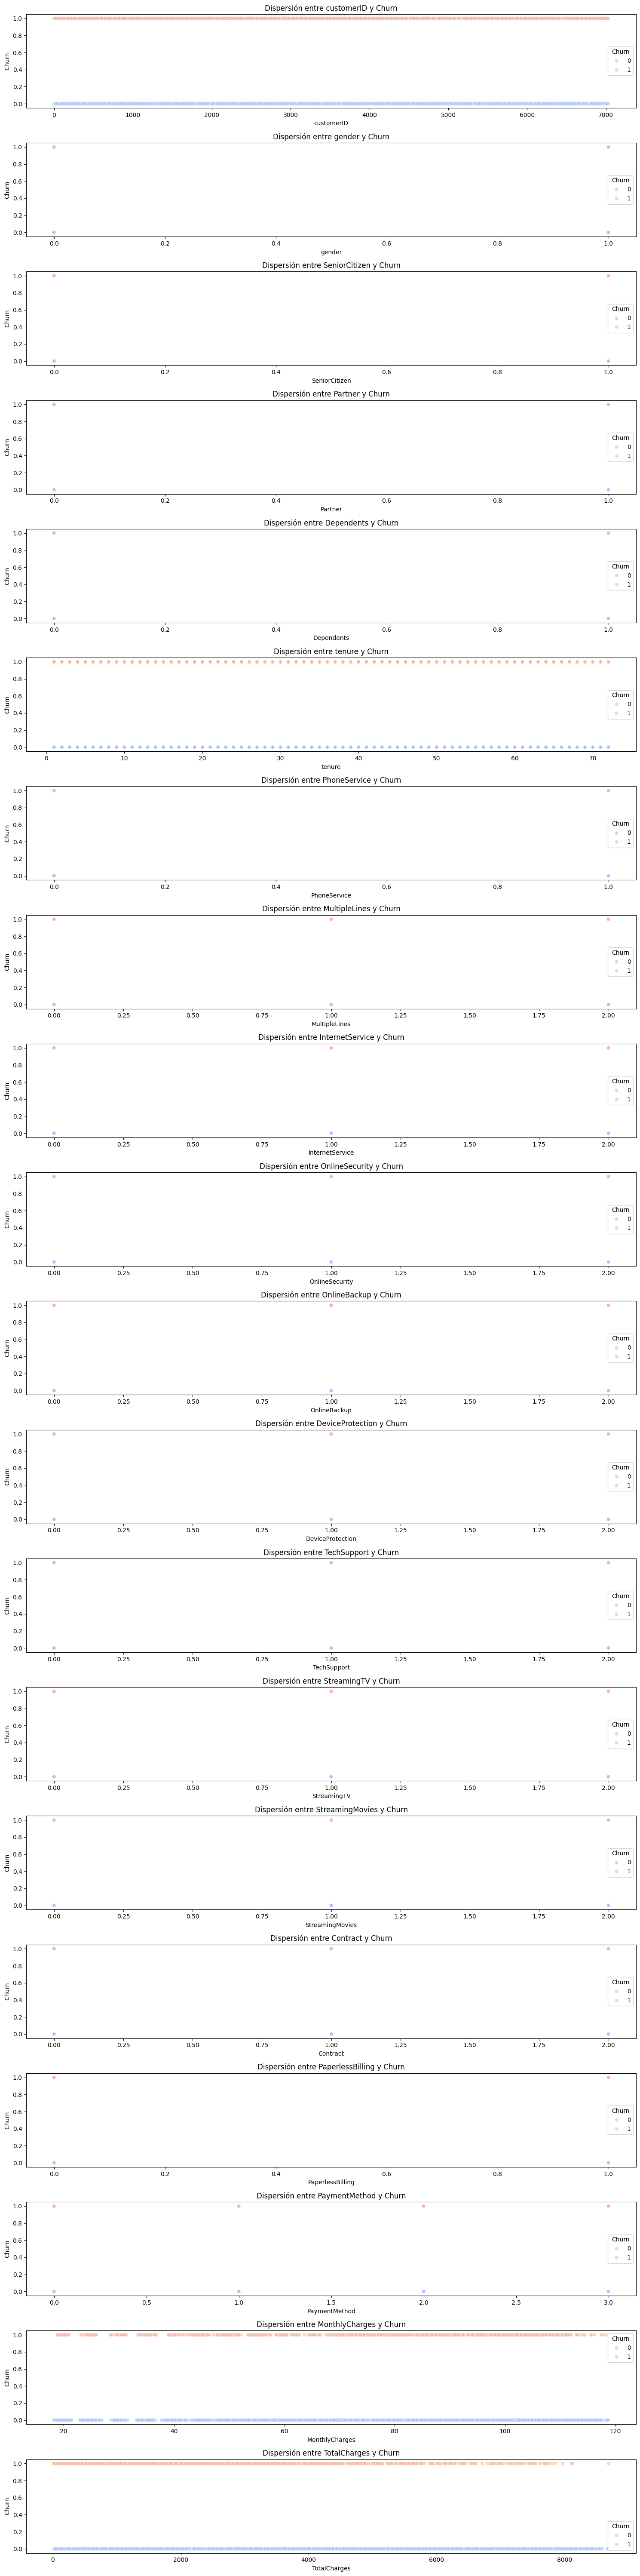

In [15]:
# Lista de columnas sin la variable objetivo
columnas = df.columns.drop('Churn')

# Crear gráficos de dispersión
plt.figure(figsize=(15, len(columnas) * 3))  # Ajusta el tamaño según el número de columnas
for i, columna in enumerate(columnas):
    plt.subplot(len(columnas), 1, i+1)  # Subplots en una sola columna
    sns.scatterplot(x=df[columna], y=df['Churn'], hue=df['Churn'], palette='coolwarm', alpha=0.6)
    plt.title(f'Dispersión entre {columna} y Churn')
    plt.tight_layout()

plt.show()


In [16]:
# Eliminar la columna 'customerID'
df = df.drop(columns=['customerID'])

# Verificar que la columna ha sido eliminada
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# 3- ENTRENAMIENTO DE MODELO

In [17]:
from sklearn.preprocessing import StandardScaler

# Crear una instancia del StandardScaler
scaler = StandardScaler()

# Seleccionar todas las columnas numéricas (en este caso, todas)
numerical_cols = ['SeniorCitizen','tenure', 'MonthlyCharges',	'TotalCharges']

# Aplicar la estandarización
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Ver los primeros registros para verificar la estandarización
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,-0.440327,1,0,-1.280248,0,1,0,0,2,0,0,0,0,0,1,2,-1.161694,-0.994194,0
1,1,-0.440327,0,0,0.064303,1,0,0,2,0,2,0,0,0,1,0,3,-0.260878,-0.173740,0
2,1,-0.440327,0,0,-1.239504,1,0,0,2,2,0,0,0,0,0,1,3,-0.363923,-0.959649,1
3,1,-0.440327,0,0,0.512486,0,1,0,2,0,2,2,0,0,1,0,0,-0.747850,-0.195248,0
4,0,-0.440327,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,2,0.196178,-0.940457,1


In [18]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7.032000e+03,7032.000000,7032.000000,7.032000e+03,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7.032000e+03,7.032000e+03,7032.000000
mean,0.504693,2.627149e-17,0.482509,0.298493,-1.126643e-16,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,6.062651e-17,-1.119064e-16,0.265785
std,0.500014,1.000071e+00,0.499729,0.457629,1.000071e+00,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,1.000071e+00,1.000071e+00,0.441782
min,0.000000,-4.403271e-01,0.000000,0.000000,-1.280248e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.547283e+00,-9.990692e-01,0.000000
25%,0.000000,-4.403271e-01,0.000000,0.000000,-9.542963e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-9.709769e-01,-8.302488e-01,0.000000
50%,1.000000,-4.403271e-01,0.000000,0.000000,-1.394171e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.845440e-01,-3.908151e-01,0.000000
75%,1.000000,-4.403271e-01,1.000000,1.000000,9.199259e-01,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,8.331482e-01,6.668271e-01,1.000000
max,1.000000,2.271039e+00,1.000000,1.000000,1.612573e+00,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.793381e+00,2.824261e+00,1.000000


In [19]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras')
print(f'Tamaño del conjunto de prueba: {X_test.shape[0]} muestras')


Tamaño del conjunto de entrenamiento: 5625 muestras
Tamaño del conjunto de prueba: 1407 muestras


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Crear el modelo de árbol de decisión
decision_tree = DecisionTreeClassifier()

# Definir el rango de hiperparámetros a probar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV con validación cruzada de 5 pliegues
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Imprimir los mejores parámetros
print(f"Mejores parámetros encontrados: {best_params}")

# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar el rendimiento del modelo
print(classification_report(y_test, y_pred))


Mejores parámetros encontrados: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407



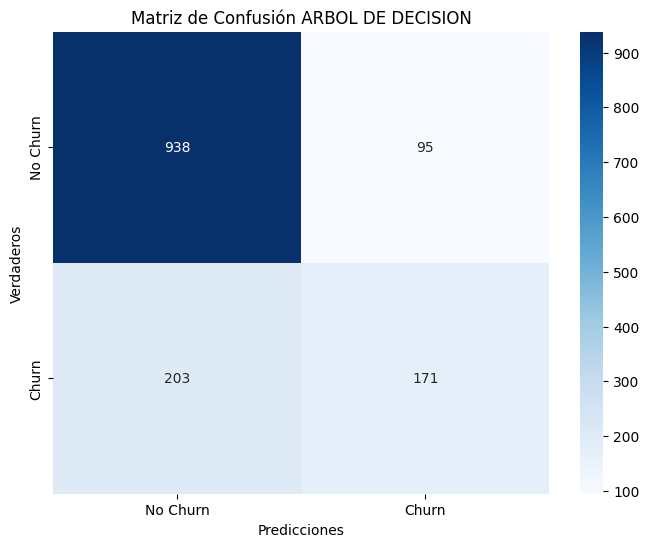

In [26]:
from sklearn.metrics import confusion_matrix


# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión ARBOL DE DECISION')
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Crear el modelo KNN
knn = KNeighborsClassifier()

# Definir el rango de hiperparámetros a probar
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Configurar GridSearchCV con validación cruzada de 5 pliegues
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Imprimir los mejores parámetros
print(f"Mejores parámetros encontrados: {best_params}")

# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar el rendimiento del modelo
print(classification_report(y_test, y_pred))


Mejores parámetros encontrados: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1033
           1       0.52      0.51      0.52       374

    accuracy                           0.75      1407
   macro avg       0.67      0.67      0.67      1407
weighted avg       0.74      0.75      0.74      1407



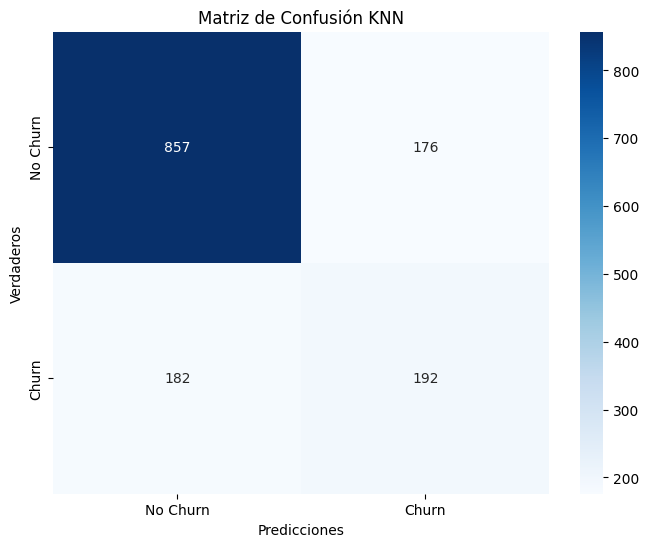

In [28]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión KNN')
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()

**El modelo de Árbol de Decisión alcanzó un accuracy del 79%, con una precisión del 82% y un recall del 46% para la clase de churn. En comparación, el modelo de K-Nearest Neighbors (KNN) logró un accuracy del 75%, con una precisión del 82% y un recall del 51% para la clase de churn. Aunque ambos modelos enfrentan dificultades para detectar clientes en riesgo, el árbol de decisión es preferible por su mayor rendimiento general y mejor interpretabilidad**